In [4]:
import gudhi
import numpy as np
import pandas as pd
import scipy.io

# O-D Height Filtration

In [29]:
def nodesExtractor(name): #extracts nodes and their corresponding information
    file_path = 'Networks/Network_Vessels_' + name +'.mat'
    matlab_data = scipy.io.loadmat(file_path)
    # Extract the 'connectivity' field from the 'Data' structured array
    data_structure = matlab_data['nodesC2']
    # Reshape or ensure it's a proper 2D array (if required)
    nodes_data = data_structure.squeeze()
    # Create a DataFrame from the connectivity data
    nodes_df = pd.DataFrame(nodes_data, columns=['NodeID', 'X', 'Y', 'Z', 'Degree'])
    # Save the DataFrame to inspect it
    return nodes_df

def edgesExtractor(name): #extracts segments to create a dataframe of from and to nodes
    file_path = 'Networks/Network_Vessels_' + name +'.mat'
    matlab_data = scipy.io.loadmat(file_path)
    # Extract the 'connectivity' field from the 'Data' structured array
    data_structure = matlab_data['segments']
    # Reshape or ensure it's a proper 2D array (if required)
    edges_data = data_structure.squeeze()
    # Create a DataFrame from the connectivity data
    edge_df = pd.DataFrame(edges_data, columns=['ID', 'From', 'To'])
    # Save the DataFrame to inspect it
    return edge_df

def inputForGUDHI(name, direction, height): #height is 1 for x, 2 for y, 3 for z
    #this creates the correct data format for GUDHI to run 0-D persistence
    edge_df = edgesExtractor(name)
    node_df = nodesExtractor(name)
    edges = list(edge_df.iloc[:,[1,2]].itertuples(index=False,name=None))
    if direction=='pos':
        node_heights = dict(zip(node_df.iloc[:,0],node_df.iloc[:,height]))
    elif direction=='neg':
        node_heights = dict(zip(node_df.iloc[:,0],437-node_df.iloc[:,height]))#CHANGE 437 IF NODES/EDGES ARE NO LONGER IN VOXELS
    return edges, node_heights

<Axes: title={'center': 'Persistence barcode'}>

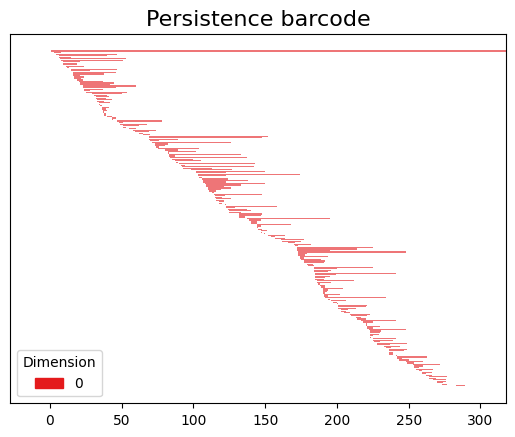

In [30]:
edges,node_heights = inputForGUDHI('m3p4_060407','pos',1)

st = gudhi.SimplexTree()

#adds vertices assigned to their height as the filtration value
for node,height in node_heights.items():
    st.insert([node],filtration=height)

#adds edges with the maximum height as filtration value
for u,v in edges:
    filt_value = max(node_heights[u],node_heights[v])
    st.insert([u,v],filtration=filt_value)

st.make_filtration_non_decreasing()

st.compute_persistence()
gudhi.plot_persistence_barcode(st.persistence())

# Alpha Complex

In [5]:
def nodesExtractor(name): #extracts nodes and their corresponding information
    file_path = 'Networks/Network_Vessels_' + name +'.mat'
    matlab_data = scipy.io.loadmat(file_path)
    # Extract the 'connectivity' field from the 'Data' structured array
    data_structure = matlab_data['nodesC2']
    # Reshape or ensure it's a proper 2D array (if required)
    nodes_data = data_structure.squeeze()
    # Create a DataFrame from the connectivity data
    nodes_df = pd.DataFrame(nodes_data, columns=['NodeID', 'X', 'Y', 'Z', 'Degree'])
    # Save the DataFrame to inspect it
    return nodes_df

def nodesToArray(name):
    nodes_df = nodesExtractor(name)
    nodes_loc = nodes_df.loc[:,['X','Y','Z']]
    loc_array = nodes_loc.to_numpy()
    return loc_array

[[222   2 393]
 [218   6 394]
 [ 51 122 331]
 ...
 [265  29 370]
 [211  13 382]
 [213  14 384]]


/Users/jmmill27/SGext/build/Geometries/networkProcessing/.venv/lib/python3.9/site-packages/gudhi/persistence_graphical_tools.py:129: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

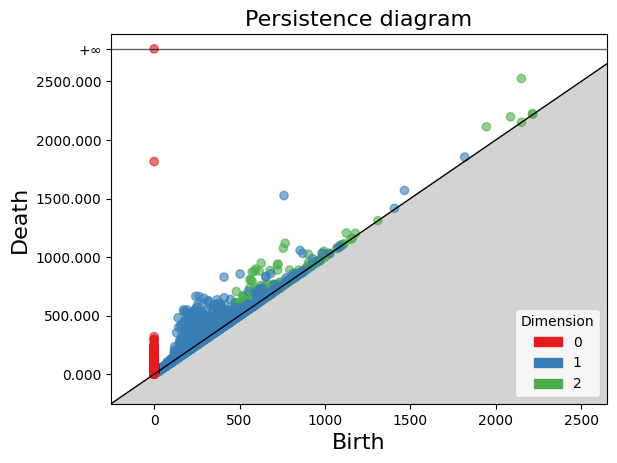

In [6]:
point_loc = nodesToArray('m3p4_060407')
print(point_loc)

alpha_complex = gudhi.AlphaComplex(points = point_loc)

alpha_stree = alpha_complex.create_simplex_tree()

alpha_stree.compute_persistence()

gudhi.plot_persistence_diagram(alpha_stree.persistence())

<Axes: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

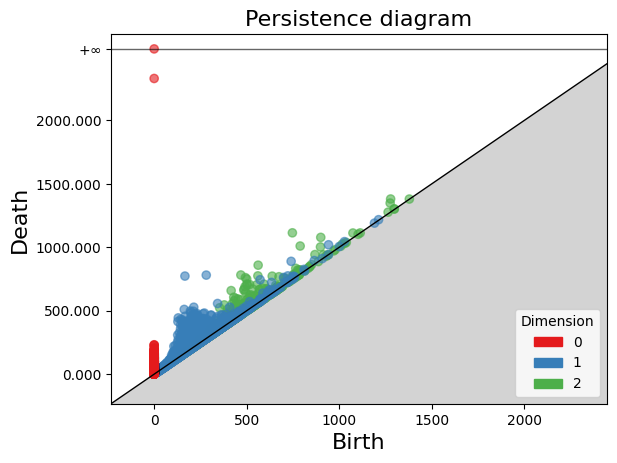

In [44]:
point_loc = nodesToArray('m2p4_053007')

alpha_complex = gudhi.AlphaComplex(points = point_loc)

alpha_stree = alpha_complex.create_simplex_tree()

alpha_stree.compute_persistence()

gudhi.plot_persistence_diagram(alpha_stree.persistence())